In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def showTimeAnalysis(file_path):
    df = pd.read_csv(file_path)

    # Extract the relevant column using its column name directly
    headers = df['Response.Headers']  # Assuming the column name is 'Response.Headers'
    cutoff_date = datetime(2023, 1, 1)  # Replace with your desired cutoff date

    # Apply the regular expression to each row in the column to extract the date
    times = headers.apply(lambda x: x if pd.notnull(x) and re.search(r'Date:\s*(.*)', x) and datetime.strptime(re.search(r'Date:\s*(.*)', x).group(1), '%Y-%m-%d') < cutoff_date else None)


    datetime_list = pd.to_datetime(times, errors='coerce').dropna().tolist()


    # Extract dates and times from the datetime list
    dates = [dt.date() for dt in datetime_list]
    times = [dt.time() for dt in datetime_list]

    # Convert times into float hours for plotting
    times_in_hours = [t.hour + t.minute / 60.0 for t in times]

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Use date format for x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator())

    # Plot the date (x) and time in hours (y)
    ax.plot(dates, times_in_hours, marker='o', linestyle='None')


    # Set labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Time (hours)')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.show()



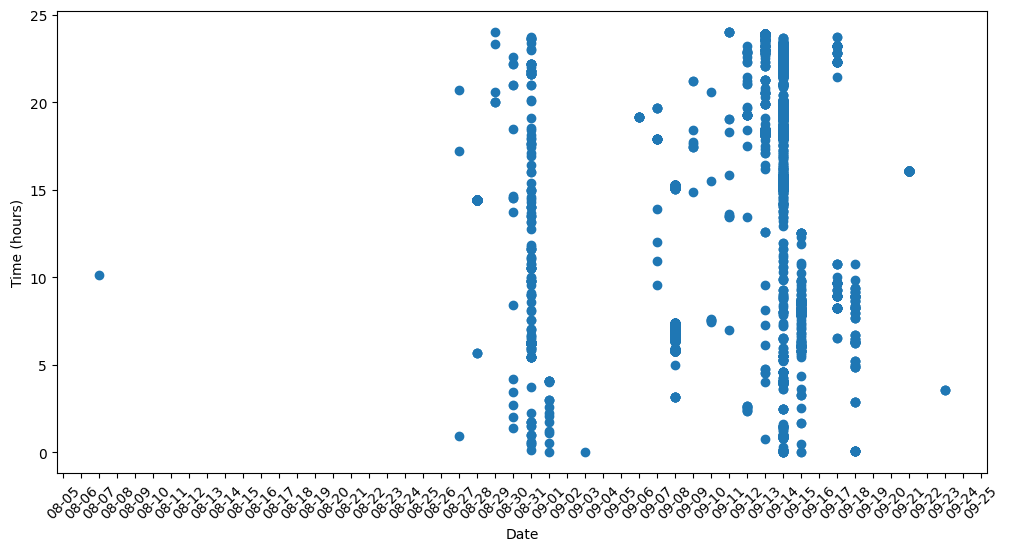

In [23]:
showTimeAnalysis('./../raise.csv')